In [16]:
# 1. Data Loading and Cleaning:

import pandas as pd

# Load the dataset
df = pd.read_csv('Sales_dataset.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Create a new column for Year-Month
df['Year-Month'] = df['Date'].dt.to_period('M')

df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year-Month
0,1.0,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0,2023-11
1,2.0,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0,2023-02
2,3.0,2023-01-13,CUST003,Male,50.0,Electronics,1.0,30.0,30.0,2023-01
3,4.0,2023-05-21,CUST004,Male,37.0,Clothing,1.0,500.0,500.0,2023-05
4,5.0,2023-05-06,CUST005,Male,30.0,Beauty,2.0,50.0,100.0,2023-05


In [8]:
# 2. Descriptive Statistics:

# Mean, Median, Mode, Standard Deviation
descriptive_stats = df.describe(include='all')
mean_price = df['Total Amount'].mean()
median_price = df['Total Amount'].median()
mode_price = df['Total Amount'].mode()[0]
std_price = df['Total Amount'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Standard Deviation of Price: {std_price}")


Mean Price: 488.87
Median Price: 150.0
Mode Price: 50.0
Standard Deviation of Price: 575.1306143365124


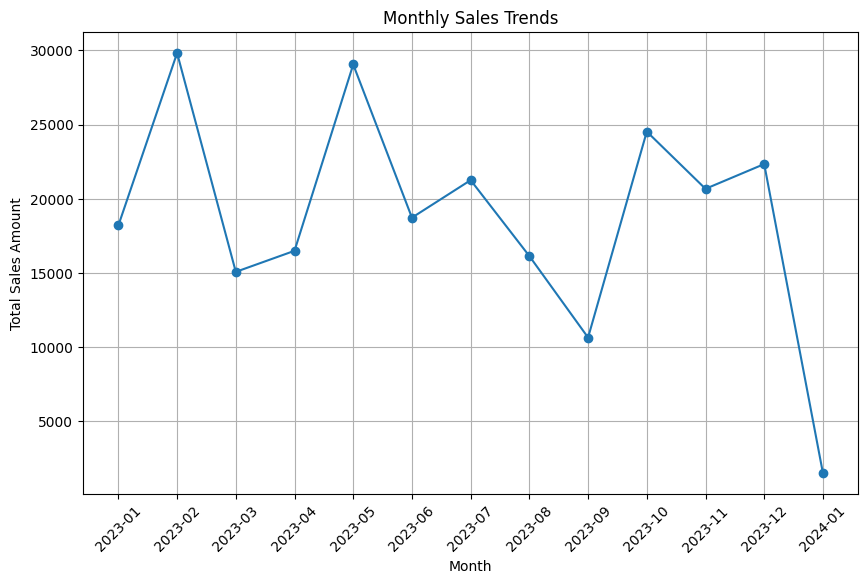

In [15]:
# 3. Times Series Analysis:

import matplotlib.pyplot as plt

# Group by Year-Month to find monthly sales totals
df_monthly_sales = df.groupby('Year-Month')['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_sales['Year-Month'].astype(str), df_monthly_sales['Total Amount'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [10]:
# 4. Customer and Product Analysis:

# Gender distribution
gender_dist = df['Gender'].value_counts()

# Age distribution
age_dist = df['Age'].describe()

print(gender_dist)
print(age_dist)


Gender
Female    256
Male      244
Name: count, dtype: int64
count    500.000000
mean      40.824000
std       13.876821
min       18.000000
25%       28.000000
50%       42.000000
75%       53.000000
max       64.000000
Name: Age, dtype: float64


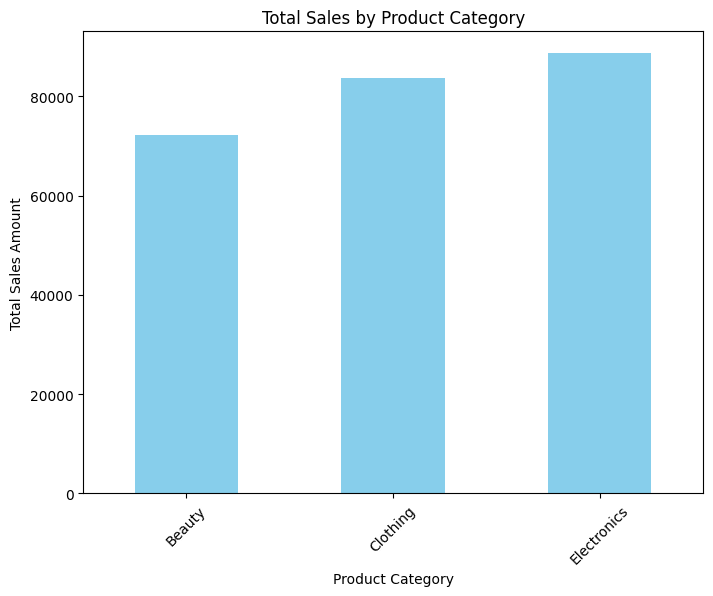

In [11]:
# 5. Visualization:

# Total sales by product category
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()

# Plotting
plt.figure(figsize=(8, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


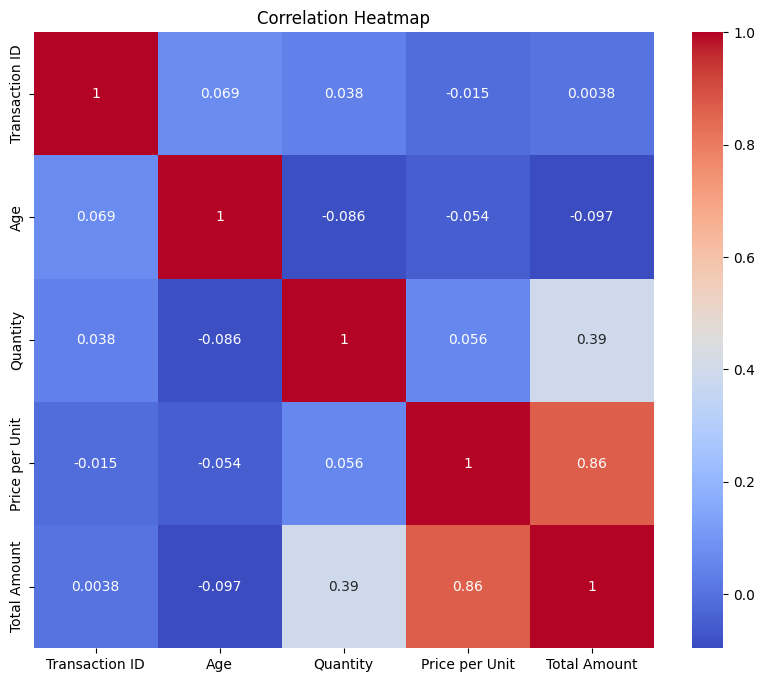

In [19]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
